<a href="https://colab.research.google.com/github/Basit1994/Basit_INSE-6220-Proj/blob/main/Pycaret_Issue_Resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Basit1994/Basit_INSE-6220-Proj/main/2017-Final.csv')
df.head(5)

,HS,E-GDP,FA,HE,FR,GC,HA
0,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,Yes
1,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,Yes
2,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,Yes
3,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,Yes
4,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,Yes


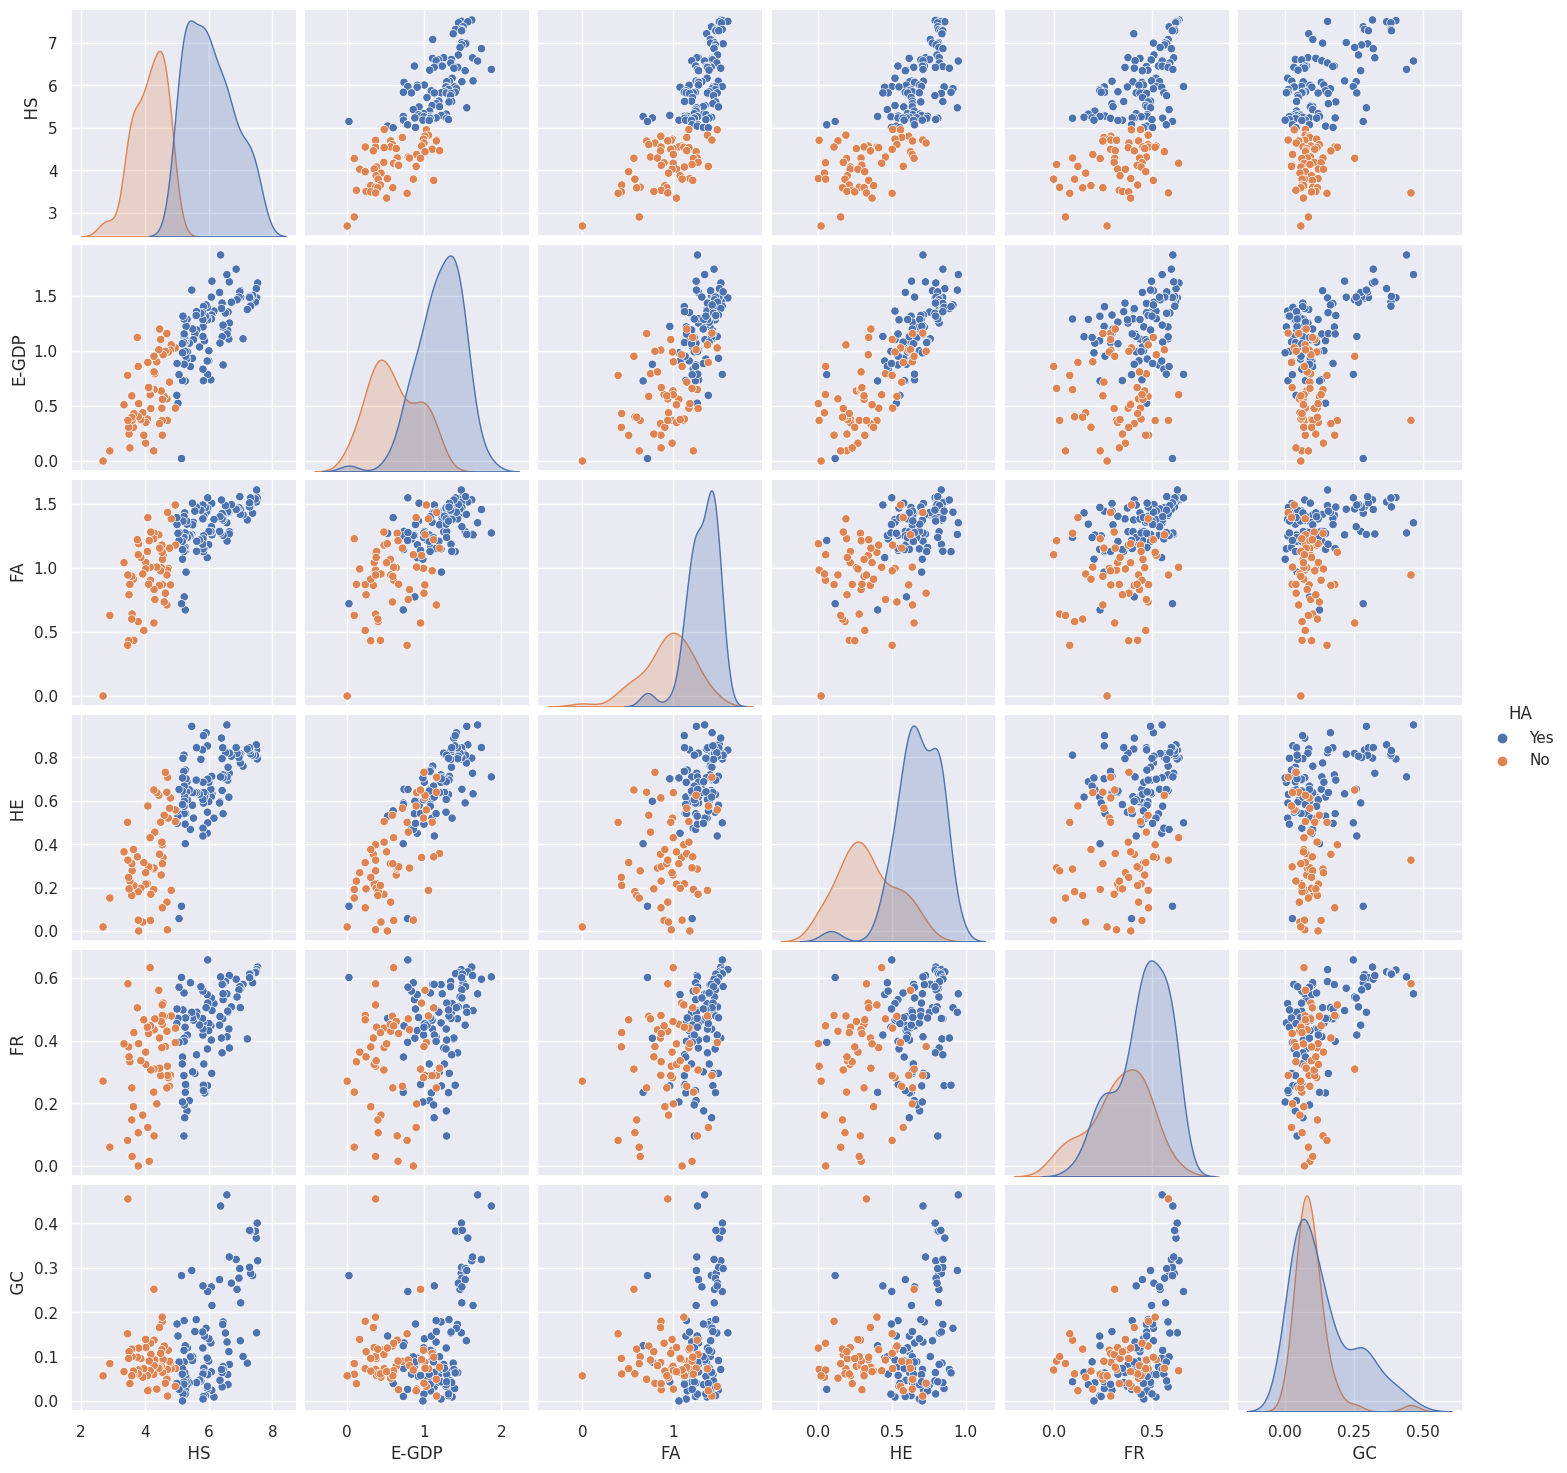

In [5]:
sns.pairplot(df, hue='HA')
plt.show()

In [6]:
X = df.drop(columns=['HA'])
X.head(10)

,HS,E-GDP,FA,HE,FR,GC
0,7.537,1.616463,1.533524,0.796667,0.635423,0.315964
1,7.522,1.482383,1.551122,0.792566,0.626007,0.400770
2,7.504,1.480633,1.610574,0.833552,0.627163,0.153527
3,7.494,1.564980,1.516912,0.858131,0.620071,0.367007
4,7.469,1.443572,1.540247,0.809158,0.617951,0.382612
5,7.377,1.503945,1.428939,0.810696,0.585384,0.282662
6,7.316,1.479204,1.481349,0.834558,0.611101,0.287372
7,7.314,1.405706,1.548195,0.816760,0.614062,0.382817
8,7.284,1.494387,1.478162,0.830875,0.612924,0.384399
9,7.284,1.484415,1.510042,0.843887,0.601607,0.301184


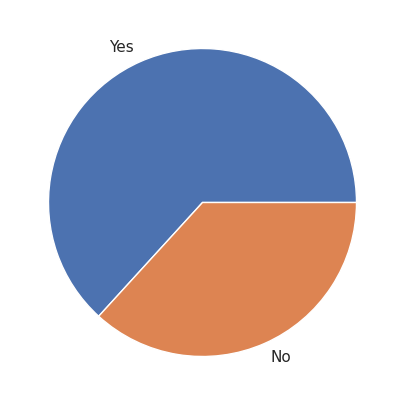

In [7]:
y =df['HA']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [8]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HS,155.0,5.354019,1.131230,2.693,4.505500,5.279000,6.101500,7.537000
E-GDP,155.0,0.984718,0.420793,0.000,0.663371,1.064578,1.318027,1.870766
FA,155.0,1.188898,0.287263,0.000,1.042635,1.253918,1.414316,1.610574
HE,155.0,0.551341,0.237073,0.000,0.369866,0.606042,0.723008,0.949492
FR,155.0,0.408786,0.149997,0.000,0.303677,0.437454,0.516561,0.658249
GC,155.0,0.123120,0.101661,0.000,0.057271,0.089848,0.153296,0.464308


In [9]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,HS,E-GDP,FA,HE,FR,GC
0,1.935996,1.506188,1.203577,1.038167,1.515836,1.903084
1,1.922693,1.186518,1.265036,1.020812,1.452859,2.739998
2,1.906730,1.182345,1.472669,1.194259,1.460590,0.300066
3,1.897861,1.383442,1.145561,1.298272,1.413155,2.406809
4,1.875689,1.093985,1.227057,1.091026,1.398978,2.560800
5,1.794098,1.237924,0.838325,1.097537,1.181161,1.574442
6,1.740000,1.178939,1.021361,1.198514,1.353163,1.620920
7,1.738226,1.003707,1.254816,1.123197,1.372968,2.562824
8,1.711620,1.215138,1.010232,1.182930,1.365357,2.578437
9,1.711620,1.191362,1.121569,1.237993,1.289666,1.757226


In [10]:
observations = list(df.index)
variables = list(df.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


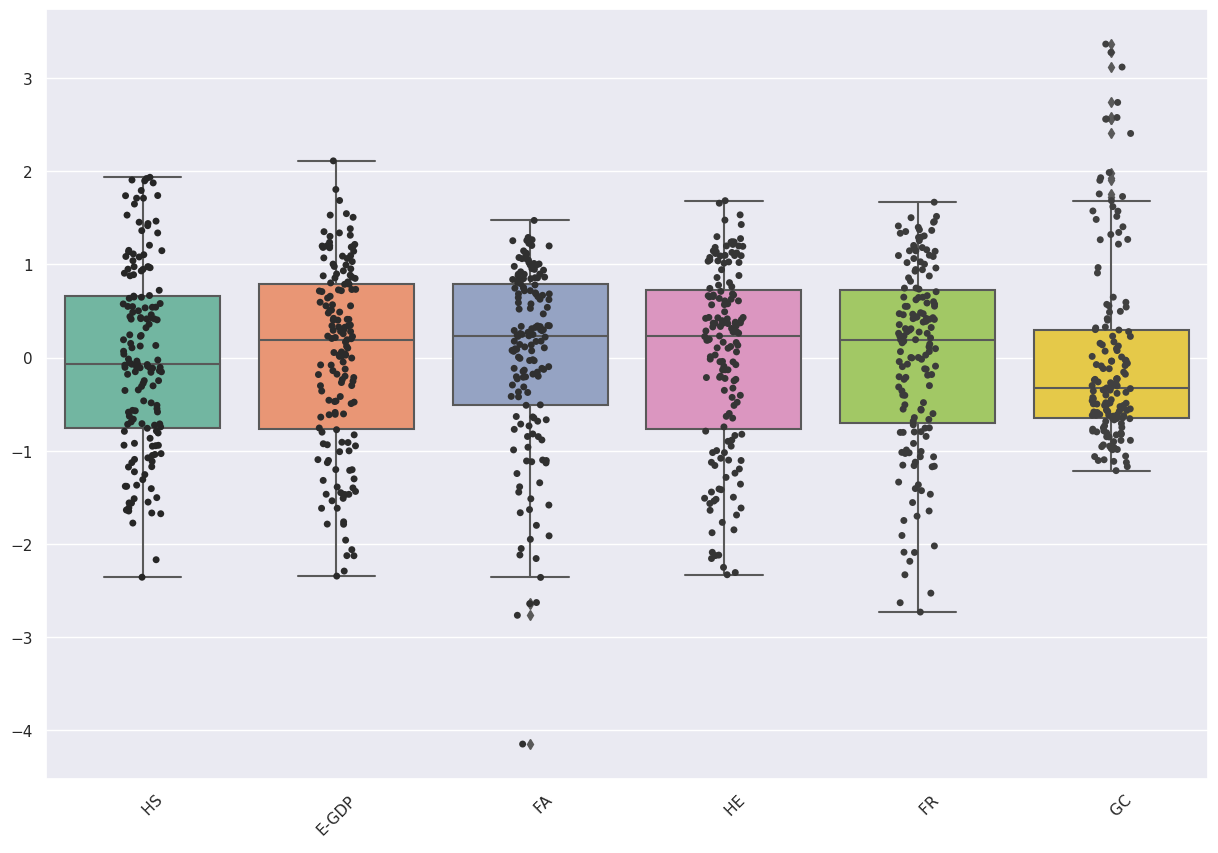

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

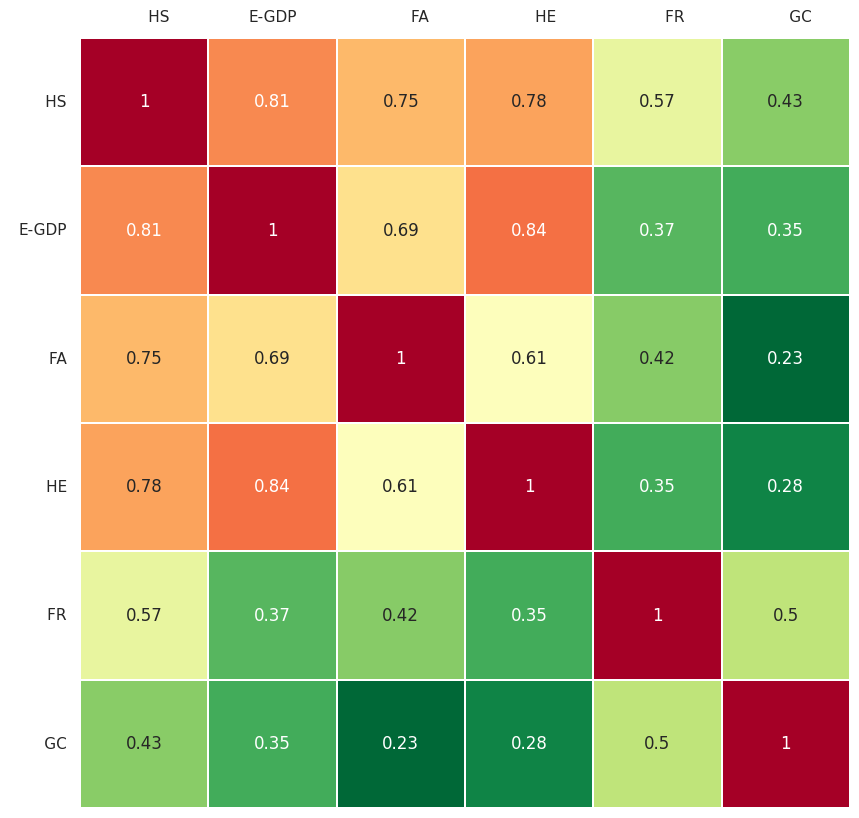

In [12]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

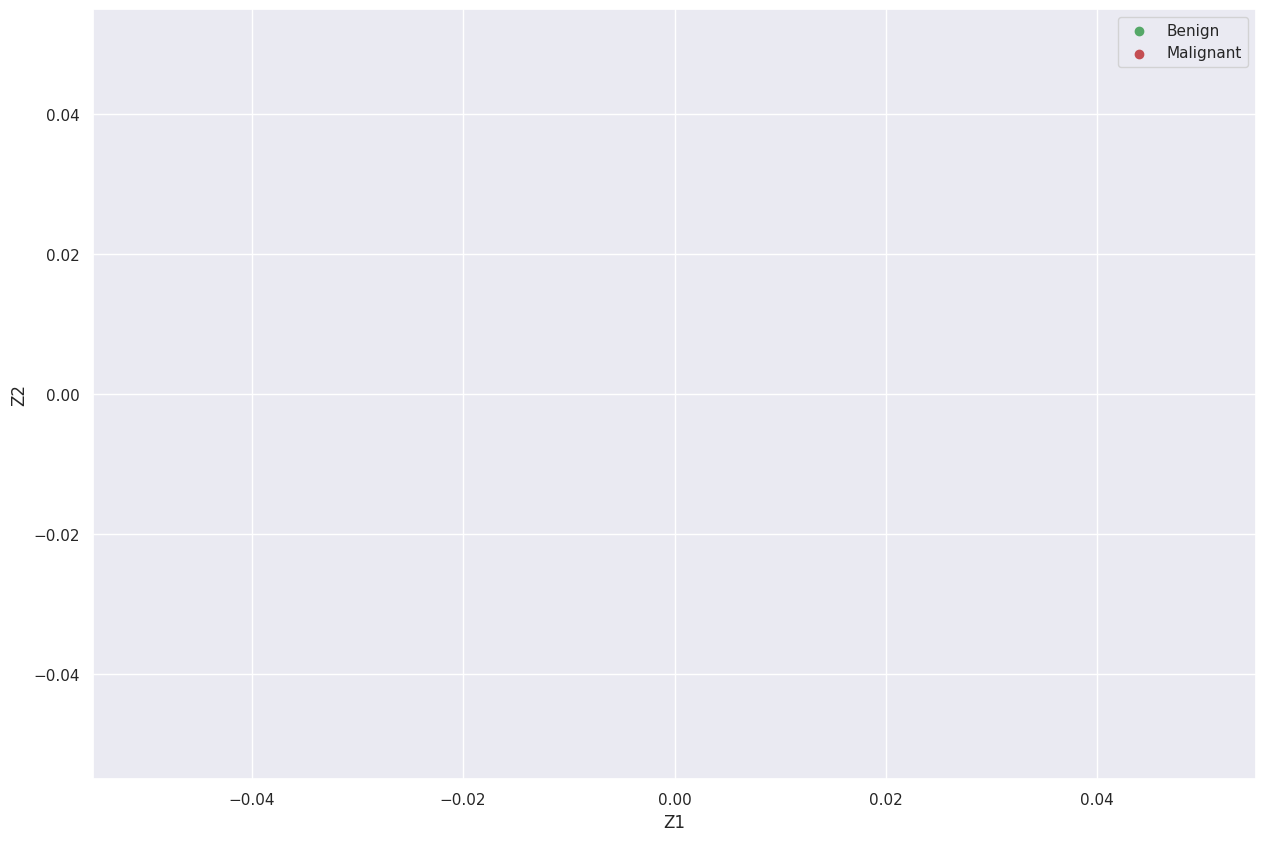

In [13]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[-0.48483199, -0.05620589, -0.06269203, -0.01580237, -0.80320096,
         0.33536106],
       [-0.46028434, -0.25532604,  0.26656965, -0.10649622,  0.52809191,
         0.60138594],
       [-0.41827876, -0.2267082 , -0.40003379,  0.7159572 ,  0.17458989,
        -0.26559912],
       [-0.44009692, -0.30277536,  0.27776331, -0.44330898, -0.00337656,
        -0.66404449],
       [-0.33122557,  0.55081889, -0.60803937, -0.414523  ,  0.21269829,
        -0.0103163 ],
       [-0.27335593,  0.69654759,  0.56402036,  0.32781391,  0.01592336,
        -0.11942994]])

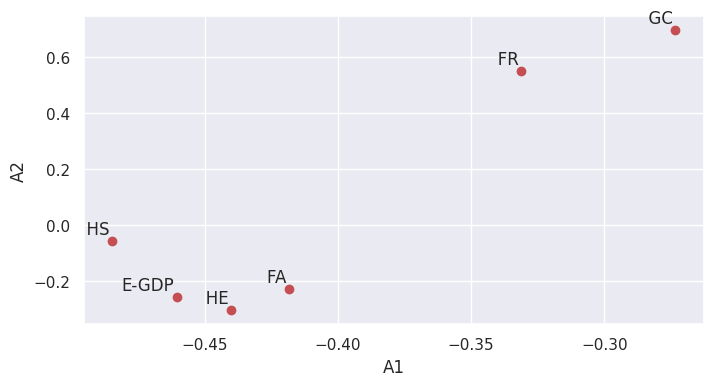

In [14]:

A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([3.78639538, 1.04113675, 0.55695838, 0.3644728 , 0.14694296,
       0.14305476])

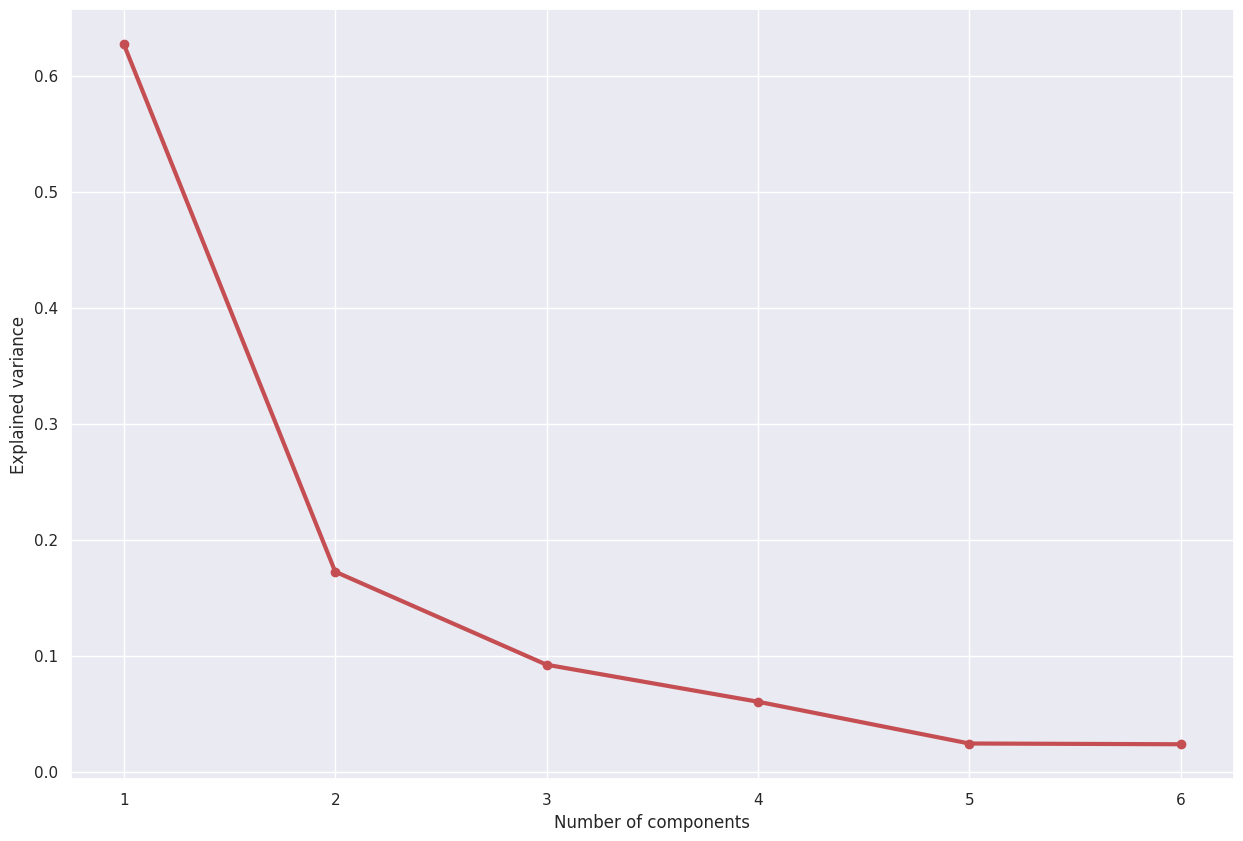

In [15]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

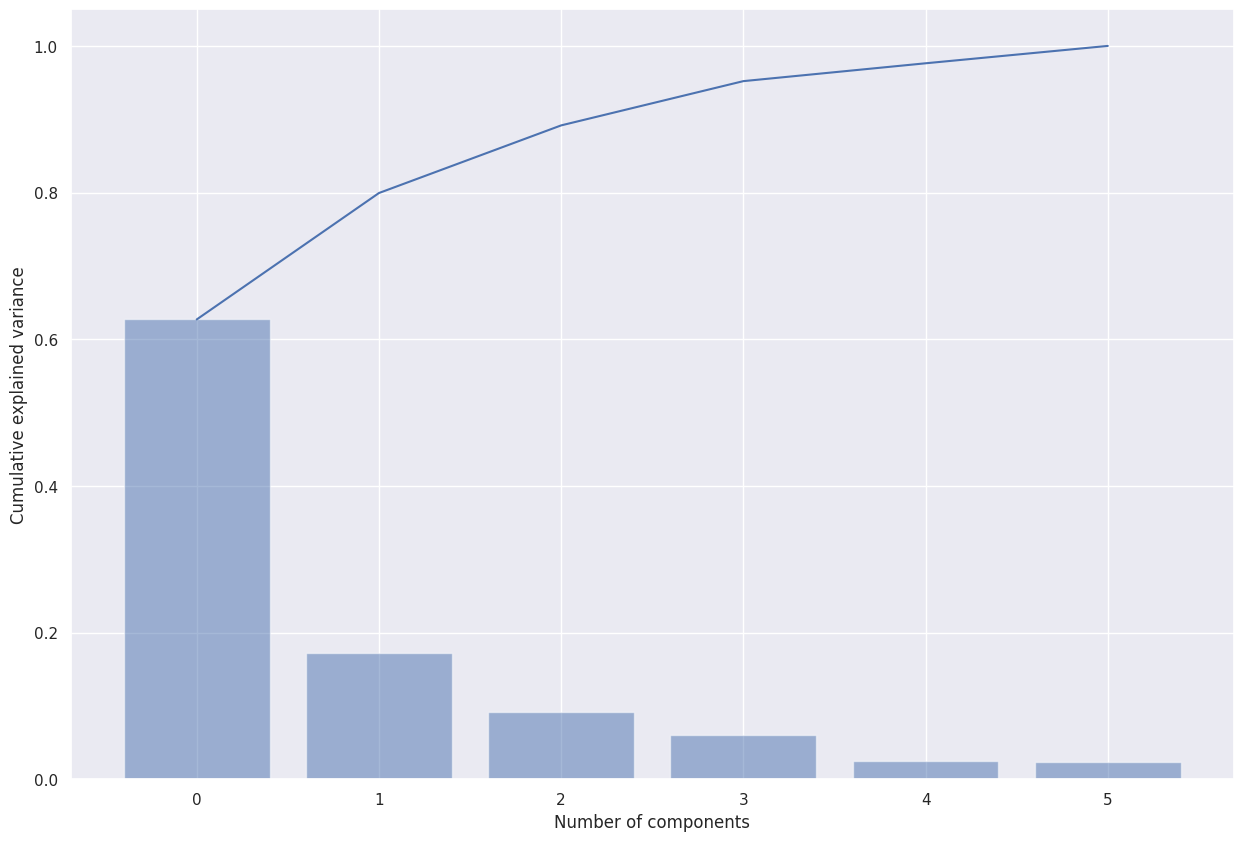

In [16]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [17]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [19]:
out['PC']

,PC1,PC2,PC3,PC4
0,-3.614535,1.079965,0.238716,0.205993
1,-3.686931,1.701915,0.635258,0.592400
2,-3.176044,-0.090980,-0.780608,-0.138186
3,-3.733439,1.342157,0.650387,0.270515
4,-3.569735,1.561035,0.579925,0.508270
...,...,...,...,...
150,0.980491,3.869943,0.933291,0.591204
151,2.942874,-0.098113,2.509119,-0.809185
152,2.139951,0.282390,-0.445285,-0.001131
153,4.472342,0.067363,1.081745,0.454183


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [97.63%] of the variance'}, xlabel='PC1 (62.6% expl.var)', ylabel='PC2 (17.2% expl.var)'>)

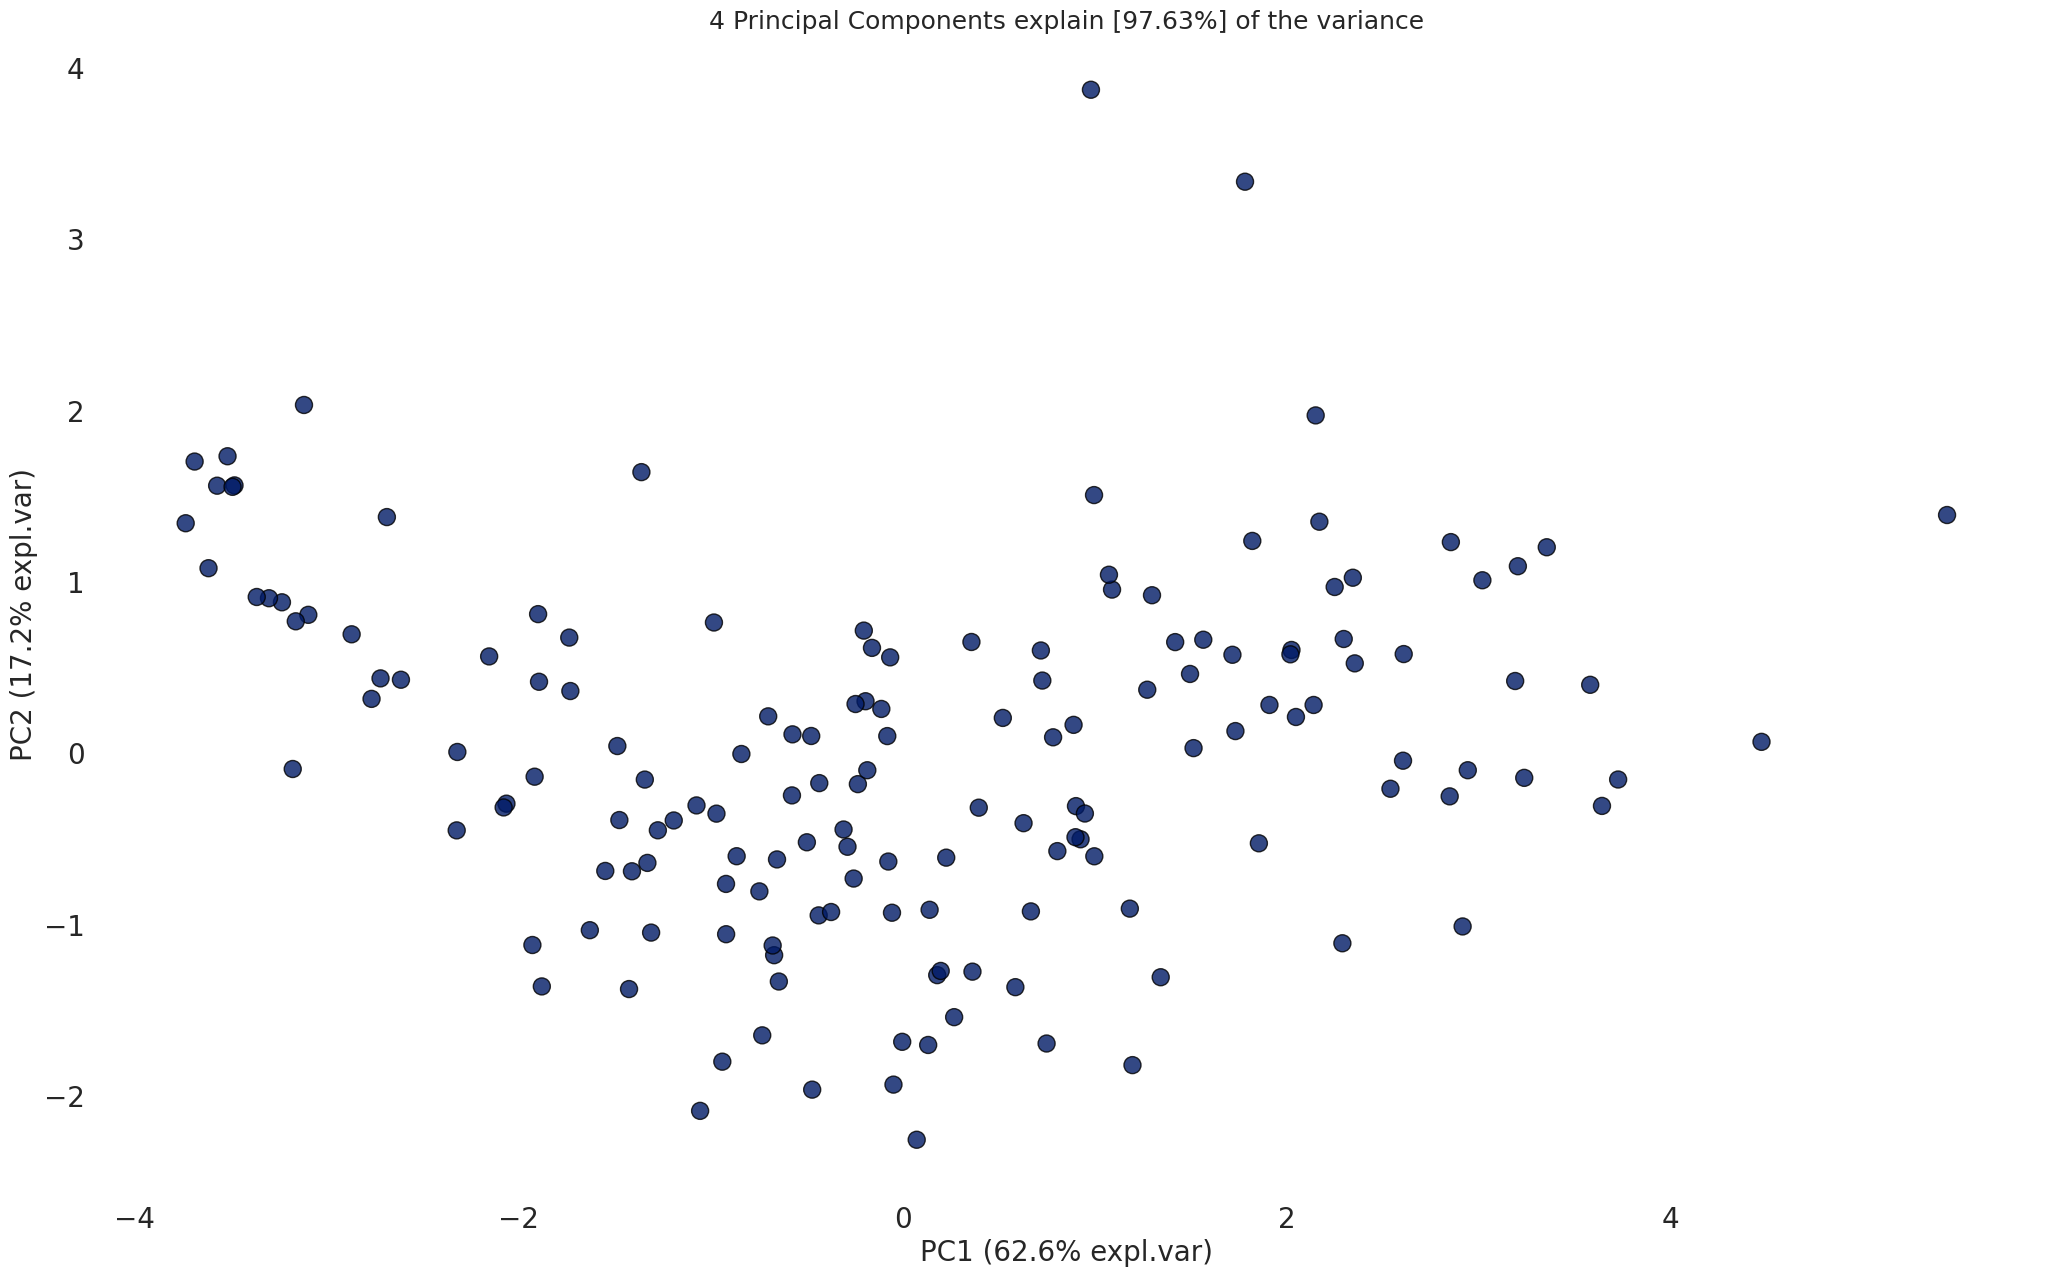

In [20]:
model.scatter(label=True, legend=False)

In [21]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4
HS,-0.484832,-0.056206,-0.062692,-0.015802
E-GDP,-0.460284,-0.255326,0.266570,-0.106496
FA,-0.418279,-0.226708,-0.400034,0.715957
HE,-0.440097,-0.302775,0.277763,-0.443309
FR,-0.331226,0.550819,-0.608039,-0.414523
GC,-0.273356,0.696548,0.564020,0.327814


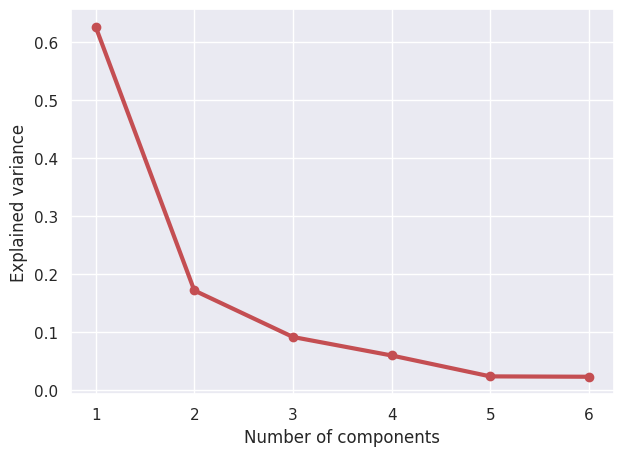

In [22]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [23]:
from pycaret.utils import version
version()

'3.0.0'

In [24]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (140, 7)
Unseen Data For Predictions: (15, 7)


In [25]:
from pycaret.classification import *
clf = setup(data=data, target='HA', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,HA
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(140, 7)"
5,Transformed data shape,"(140, 7)"
6,Transformed train set shape,"(98, 7)"
7,Transformed test set shape,"(42, 7)"
8,Numeric features,6
9,Preprocess,True


In [26]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9900,0.9875,1.0000,0.9857,0.9923,0.9783,0.9802,0.1100
ada,Ada Boost Classifier,0.9900,0.9875,1.0000,0.9857,0.9923,0.9783,0.9802,0.0690
gbc,Gradient Boosting Classifier,0.9900,0.9875,1.0000,0.9857,0.9923,0.9783,0.9802,0.1810
xgboost,Extreme Gradient Boosting,0.9900,1.0000,1.0000,0.9857,0.9923,0.9783,0.9802,0.1030
lr,Logistic Regression,0.9689,1.0000,0.9833,0.9714,0.9755,0.9334,0.9394,0.5710
rf,Random Forest Classifier,0.9678,0.9917,0.9667,0.9857,0.9723,0.9354,0.9434,0.4180
knn,K Neighbors Classifier,0.9589,1.0000,0.9833,0.9607,0.9689,0.9097,0.9205,0.0760
lightgbm,Light Gradient Boosting Machine,0.9578,1.0000,0.9667,0.9750,0.9657,0.9117,0.9245,0.1790
et,Extra Trees Classifier,0.9478,0.9917,0.9500,0.9690,0.9556,0.8937,0.9018,0.5730
svm,SVM - Linear Kernel,0.9289,0.0000,0.9690,0.9315,0.9470,0.8376,0.8517,0.0880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]